In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from tensorflow.random import set_seed
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image

In [5]:
!rm -Rf colab-data
!wget -O colab-data.zip http://51.91.120.89/extras/cnn-colab-data.zip
!unzip -q colab-data.zip

--2022-06-11 13:28:42--  http://51.91.120.89/extras/cnn-colab-data.zip
Connecting to 51.91.120.89:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 932228 (910K) [application/zip]
Saving to: ‘colab-data.zip’

colab-data.zip      100%[===================>] 910.38K  1.68MB/s    in 0.5s    

2022-06-11 13:28:43 (1.68 MB/s) - ‘colab-data.zip’ saved [932228/932228]



In [9]:
# Augmentacja danych treningowych

train_datagen = ImageDataGenerator(
    rotation_range = 40, 
    rescale = 1/255,
    zoom_range = .2,
    horizontal_flip = True,
    shear_range = .2,
    fill_mode = "nearest",
    width_shift_range = .2,
    height_shift_range= .2
)

test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(directory="colab-data/train", seed=42, 
                                                    target_size=(170, 250), class_mode="binary" )

test_generator = test_datagen.flow_from_directory(directory="colab-data/test", seed=42, 
                                                    target_size=(170, 250), class_mode="binary" )

Found 98 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


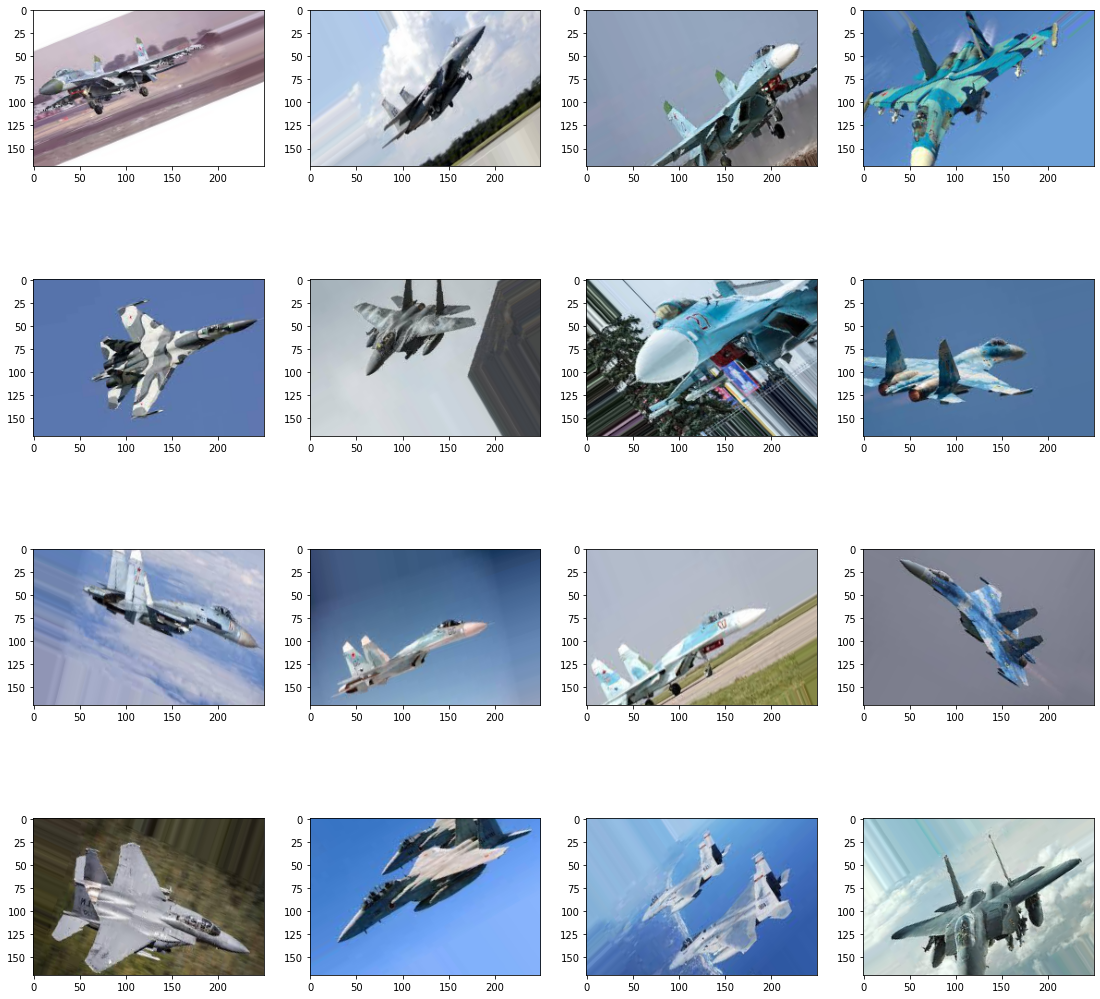

In [10]:
plt.subplots(4, 4, figsize=(19,19))
for index in range(16):
  img , label = train_generator.next()
  plt.subplot(4, 4, index+1)
  plt.imshow(img[0])

In [ ]:
# budowa sieci CNN v2

set_seed(0)
model = Sequential()

model.add( Conv2D(32, kernel_size=(3,3), input_shape=(170,250,3), activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2)) )
model.add( Dropout(0.2) )

model.add( Conv2D(32, kernel_size=(3,3), activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2)) )
model.add( Dropout(0.2) )

model.add( Flatten() )
model.add( Dense(128, activation="relu") )
model.add( Dense(1, activation="sigmoid") )

model.compile(loss="binary_crossentropy", metrics=["accuracy"])
cp = ModelCheckpoint("/content/drive/MyDrive/aircraft-best.h5", monitor="val_accuracy", save_best_only=True)

result = model.fit_generator(generator=train_generator, epochs=80, validation_data=test_generator, callbacks=[cp])



In [15]:
test_generator.class_indices

{'f15': 0, 'su27': 1}

In [23]:
!wget -O aircraft.h5 http://51.91.120.89/extras/aircraft-v2.h5

--2022-06-11 14:38:59--  http://51.91.120.89/extras/aircraft-v2.h5
Connecting to 51.91.120.89:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86126936 (82M)
Saving to: ‘aircraft.h5’

aircraft.h5         100%[===================>]  82.14M  4.50MB/s    in 13s     

2022-06-11 14:39:13 (6.30 MB/s) - ‘aircraft.h5’ saved [86126936/86126936]



In [24]:
from tensorflow.keras.models import load_model

model = load_model("aircraft.h5")

In [25]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 250, 170, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 125, 85, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 125, 85, 64)       18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 62, 42, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 62, 42, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 31, 21, 128)     

[[0.]]


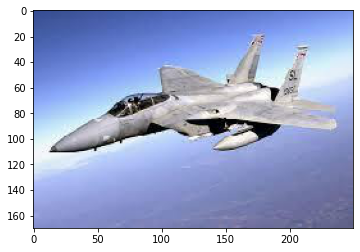

In [27]:
img_path = "/content/colab-data/test/f15/f15-049.jpeg"
img = image.load_img(img_path, target_size=(170,250))
img_array = image.img_to_array(img)

print(model.predict( img_array.reshape(1,250,170,3) ))
plt.imshow(img)

[[1.]]


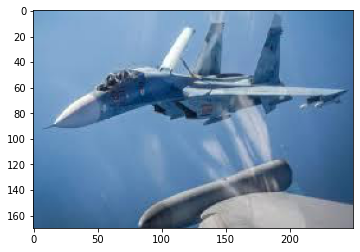

In [30]:
img_path = "/content/colab-data/test/su27/su27-061.jpeg"
img = image.load_img(img_path, target_size=(170,250))
img_array = image.img_to_array(img)

print(model.predict( img_array.reshape(1,250,170,3) ))
plt.imshow(img)